In [1]:
from sqlalchemy import create_engine
import pandas as pd
import plotly.express as px
import datetime
import json

In [ ]:
#plotly nachinstallieren

Datenquelle: https://www.rki.de/DE/Home/homepage_node.html

In [2]:
f = open("credentials.txt")
data = json.load(f)

f.close()

In [3]:
database = data['database']
username = data['username']
password = data['password']
host = data['host']

In [35]:
engine = create_engine(f'postgresql://{username}:{password}@{host}:5432/{database}')

In [6]:
corona_tagesaktuell = pd.read_csv("../Datasets/corona_tagesaktuell.csv", sep=";")

In [7]:
corona_tagesaktuell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576206 entries, 0 to 1576205
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Unnamed: 0            1576206 non-null  int64 
 1   ObjectId              1576206 non-null  int64 
 2   IdBundesland          1576206 non-null  int64 
 3   Bundesland            1576206 non-null  object
 4   Landkreis             1576206 non-null  object
 5   Altersgruppe          1576206 non-null  object
 6   Geschlecht            1576206 non-null  object
 7   AnzahlFall            1576206 non-null  int64 
 8   AnzahlTodesfall       1576206 non-null  int64 
 9   Meldedatum            1576206 non-null  object
 10  IdLandkreis           1576206 non-null  int64 
 11  Datenstand            1576206 non-null  object
 12  NeuerFall             1576206 non-null  int64 
 13  NeuerTodesfall        1576206 non-null  int64 
 14  Refdatum              1576206 non-null  object
 15

In [8]:
corona_tagesaktuell['Refdatum']

0          2020/09/30 00:00:00+00
1          2020/10/29 00:00:00+00
2          2020/11/03 00:00:00+00
3          2020/11/19 00:00:00+00
4          2020/11/18 00:00:00+00
                    ...          
1576201    2021/03/24 00:00:00+00
1576202    2021/03/26 00:00:00+00
1576203    2021/03/30 00:00:00+00
1576204    2021/04/02 00:00:00+00
1576205    2021/04/03 00:00:00+00
Name: Refdatum, Length: 1576206, dtype: object

In [10]:
divi = pd.read_csv("../Datasets/divi_data.csv",sep=",")

In [11]:
divi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   bundesland                            397 non-null    int64 
 1   gemeindeschluessel                    397 non-null    int64 
 2   anzahl_meldebereiche                  397 non-null    int64 
 3   faelle_covid_aktuell                  397 non-null    int64 
 4   faelle_covid_aktuell_invasiv_beatmet  397 non-null    int64 
 5   anzahl_standorte                      397 non-null    int64 
 6   betten_frei                           397 non-null    int64 
 7   betten_belegt                         397 non-null    int64 
 8   daten_stand                           397 non-null    object
 9   betten_belegt_nur_erwachsen           397 non-null    int64 
 10  betten_frei_nur_erwachsen             397 non-null    int64 
dtypes: int64(10), object(1)
memory u

In [12]:
divi

,bundesland,gemeindeschluessel,anzahl_meldebereiche,faelle_covid_aktuell,faelle_covid_aktuell_invasiv_beatmet,anzahl_standorte,betten_frei,betten_belegt,daten_stand,betten_belegt_nur_erwachsen,betten_frei_nur_erwachsen
0,1,1001,3,3,3,2,6,35,2021-04-06 12:15:00,35,0
1,1,1002,5,6,5,3,52,112,2021-04-06 12:15:00,111,47
2,1,1003,2,6,2,2,32,103,2021-04-06 12:15:00,103,32
3,1,1004,1,0,0,1,5,20,2021-04-06 12:15:00,20,5
4,1,1051,1,0,0,1,1,37,2021-04-06 12:15:00,37,1
...,...,...,...,...,...,...,...,...,...,...,...
392,16,16073,1,11,8,1,3,18,2021-04-06 12:15:00,18,3
393,16,16074,1,1,1,1,0,5,2021-04-06 12:15:00,5,0
394,16,16075,1,4,4,1,0,5,2021-04-06 12:15:00,5,0
395,16,16076,1,6,6,1,1,9,2021-04-06 12:15:00,9,1


In [13]:
corona_tagesaktuell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576206 entries, 0 to 1576205
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Unnamed: 0            1576206 non-null  int64 
 1   ObjectId              1576206 non-null  int64 
 2   IdBundesland          1576206 non-null  int64 
 3   Bundesland            1576206 non-null  object
 4   Landkreis             1576206 non-null  object
 5   Altersgruppe          1576206 non-null  object
 6   Geschlecht            1576206 non-null  object
 7   AnzahlFall            1576206 non-null  int64 
 8   AnzahlTodesfall       1576206 non-null  int64 
 9   Meldedatum            1576206 non-null  object
 10  IdLandkreis           1576206 non-null  int64 
 11  Datenstand            1576206 non-null  object
 12  NeuerFall             1576206 non-null  int64 
 13  NeuerTodesfall        1576206 non-null  int64 
 14  Refdatum              1576206 non-null  object
 15

In [16]:
corona_tagesaktuell

,Unnamed: 0,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,0,1,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/09/30 00:00:00+00,1001,"06.04.2021, 00:00 Uhr",0,-9,2020/09/30 00:00:00+00,0,1,0,Nicht übermittelt
1,1,2,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/10/29 00:00:00+00,1001,"06.04.2021, 00:00 Uhr",0,-9,2020/10/29 00:00:00+00,0,1,0,Nicht übermittelt
2,2,3,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/03 00:00:00+00,1001,"06.04.2021, 00:00 Uhr",0,-9,2020/11/03 00:00:00+00,0,1,0,Nicht übermittelt
3,3,4,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/20 00:00:00+00,1001,"06.04.2021, 00:00 Uhr",0,-9,2020/11/19 00:00:00+00,0,1,1,Nicht übermittelt
4,4,5,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/23 00:00:00+00,1001,"06.04.2021, 00:00 Uhr",0,-9,2020/11/18 00:00:00+00,0,1,1,Nicht übermittelt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576201,1576201,1576202,16,Thüringen,LK Altenburger Land,A80+,W,1,1,2021/03/24 00:00:00+00,16077,"06.04.2021, 00:00 Uhr",0,0,2021/03/24 00:00:00+00,-9,0,0,Nicht übermittelt
1576202,1576202,1576203,16,Thüringen,LK Altenburger Land,A80+,W,2,0,2021/03/26 00:00:00+00,16077,"06.04.2021, 00:00 Uhr",0,-9,2021/03/26 00:00:00+00,-9,0,0,Nicht übermittelt
1576203,1576203,1576204,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021/03/30 00:00:00+00,16077,"06.04.2021, 00:00 Uhr",0,-9,2021/03/30 00:00:00+00,-9,0,0,Nicht übermittelt
1576204,1576204,1576205,16,Thüringen,LK Altenburger Land,A80+,W,2,0,2021/04/02 00:00:00+00,16077,"06.04.2021, 00:00 Uhr",0,-9,2021/04/02 00:00:00+00,-9,0,0,Nicht übermittelt


In [14]:
corona_tagesaktuell['Datenstand']

0          06.04.2021, 00:00 Uhr
1          06.04.2021, 00:00 Uhr
2          06.04.2021, 00:00 Uhr
3          06.04.2021, 00:00 Uhr
4          06.04.2021, 00:00 Uhr
                   ...          
1576201    06.04.2021, 00:00 Uhr
1576202    06.04.2021, 00:00 Uhr
1576203    06.04.2021, 00:00 Uhr
1576204    06.04.2021, 00:00 Uhr
1576205    06.04.2021, 00:00 Uhr
Name: Datenstand, Length: 1576206, dtype: object

## Datumskonvertierung

In [15]:
corona_tagesaktuell['Datenstand'] = corona_tagesaktuell['Datenstand'].apply(lambda x: x.split(",")[0])

In [16]:
corona_tagesaktuell['Datenstand'] = pd.to_datetime(corona_tagesaktuell['Datenstand'],format='%d.%m.%Y')

In [17]:
corona_tagesaktuell['Datenstand'] = corona_tagesaktuell['Datenstand'].dt.date.astype("datetime64[ns]")

In [18]:
del(corona_tagesaktuell['Unnamed: 0'])

In [19]:
corona_tagesaktuell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576206 entries, 0 to 1576205
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ObjectId              1576206 non-null  int64         
 1   IdBundesland          1576206 non-null  int64         
 2   Bundesland            1576206 non-null  object        
 3   Landkreis             1576206 non-null  object        
 4   Altersgruppe          1576206 non-null  object        
 5   Geschlecht            1576206 non-null  object        
 6   AnzahlFall            1576206 non-null  int64         
 7   AnzahlTodesfall       1576206 non-null  int64         
 8   Meldedatum            1576206 non-null  object        
 9   IdLandkreis           1576206 non-null  int64         
 10  Datenstand            1576206 non-null  datetime64[ns]
 11  NeuerFall             1576206 non-null  int64         
 12  NeuerTodesfall        1576206 non-null  in

In [21]:
divi["daten_stand"] = pd.to_datetime(divi['daten_stand'],format='%Y-%m-%d')

In [23]:
divi["daten_stand"].dt.date

0      2021-04-06
1      2021-04-06
2      2021-04-06
3      2021-04-06
4      2021-04-06
          ...    
392    2021-04-06
393    2021-04-06
394    2021-04-06
395    2021-04-06
396    2021-04-06
Name: daten_stand, Length: 397, dtype: object

In [24]:
divi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   bundesland                            397 non-null    int64         
 1   gemeindeschluessel                    397 non-null    int64         
 2   anzahl_meldebereiche                  397 non-null    int64         
 3   faelle_covid_aktuell                  397 non-null    int64         
 4   faelle_covid_aktuell_invasiv_beatmet  397 non-null    int64         
 5   anzahl_standorte                      397 non-null    int64         
 6   betten_frei                           397 non-null    int64         
 7   betten_belegt                         397 non-null    int64         
 8   daten_stand                           397 non-null    datetime64[ns]
 9   betten_belegt_nur_erwachsen           397 non-null    int64         
 10  be

In [22]:
divi

,bundesland,gemeindeschluessel,anzahl_meldebereiche,faelle_covid_aktuell,faelle_covid_aktuell_invasiv_beatmet,anzahl_standorte,betten_frei,betten_belegt,daten_stand,betten_belegt_nur_erwachsen,betten_frei_nur_erwachsen
0,1,1001,3,3,3,2,6,35,2021-04-06 12:15:00,35,0
1,1,1002,5,6,5,3,52,112,2021-04-06 12:15:00,111,47
2,1,1003,2,6,2,2,32,103,2021-04-06 12:15:00,103,32
3,1,1004,1,0,0,1,5,20,2021-04-06 12:15:00,20,5
4,1,1051,1,0,0,1,1,37,2021-04-06 12:15:00,37,1
...,...,...,...,...,...,...,...,...,...,...,...
392,16,16073,1,11,8,1,3,18,2021-04-06 12:15:00,18,3
393,16,16074,1,1,1,1,0,5,2021-04-06 12:15:00,5,0
394,16,16075,1,4,4,1,0,5,2021-04-06 12:15:00,5,0
395,16,16076,1,6,6,1,1,9,2021-04-06 12:15:00,9,1


In [23]:
divi['daten_stand'] = divi['daten_stand'].dt.date.astype("datetime64[ns]")

## Gruppieren des corona_tagesaktuell Datasets um Datasets zu mergen

In [25]:
corona_tagesaktuell.groupby("Altersgruppe").agg({"AnzahlFall":sum,"AnzahlTodesfall":sum,"AnzahlGenesen":sum})

,AnzahlFall,AnzahlTodesfall,AnzahlGenesen
Altersgruppe,,,
A00-A04,64083,8,54613
A05-A14,180260,7,158118
A15-A34,840054,111,773815
A35-A59,1106813,2624,1016525
A60-A79,440373,21116,387439
A80+,265795,53219,203583
unbekannt,3287,17,2902


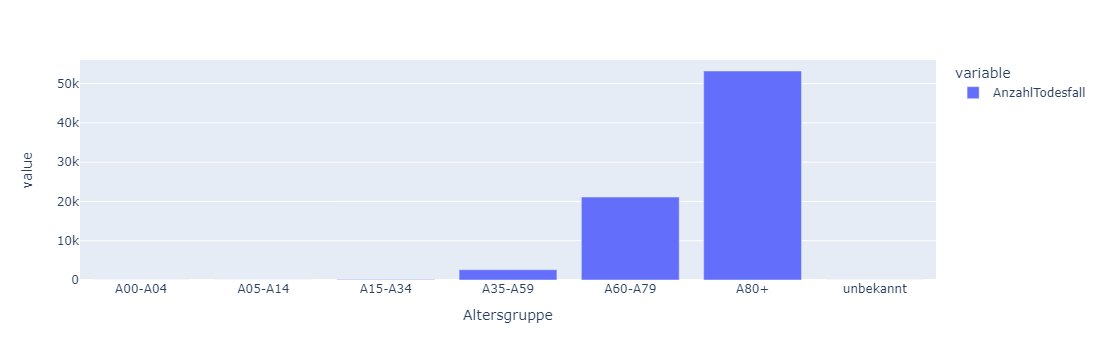

In [27]:
px.bar(corona_tagesaktuell.groupby("Altersgruppe").agg({"AnzahlTodesfall":sum}))
###Man muss vorsichtig sein: Sterblichkeitsrate hängt nicht zwingend mit Alter, sondern eher mit Vorerkrankungen zusammen.
###Es ist nur sehr viel wahrscheinlicher, dass Leute in hohem Alter mehr Vorerkrankungen haben.

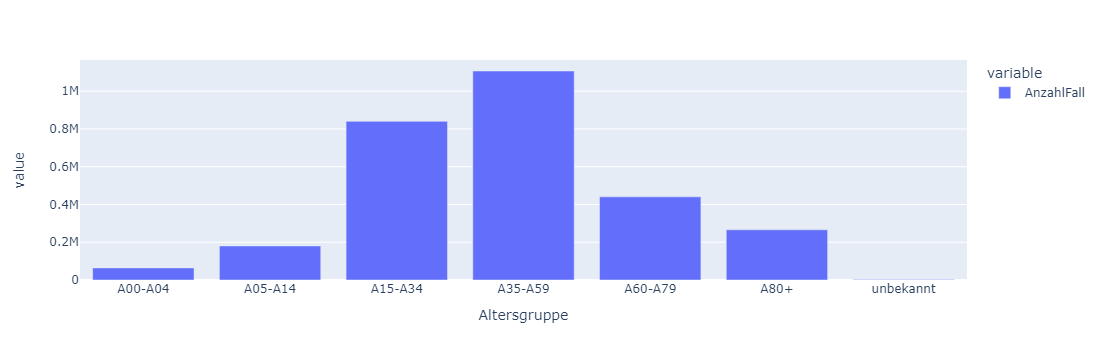

In [28]:
px.bar(corona_tagesaktuell.groupby("Altersgruppe").agg({"AnzahlFall":sum}))

In [29]:
corona_grouped = corona_tagesaktuell.groupby(["IdLandkreis","Landkreis","Datenstand"]).agg({"AnzahlFall":sum,"AnzahlTodesfall":sum,"AnzahlGenesen":sum}).reset_index()

In [30]:
corona_grouped

,IdLandkreis,Landkreis,Datenstand,AnzahlFall,AnzahlTodesfall,AnzahlGenesen
0,1001,SK Flensburg,2021-04-06,2047,39,1860
1,1002,SK Kiel,2021-04-06,4041,92,3723
2,1003,SK Lübeck,2021-04-06,4852,89,4534
3,1004,SK Neumünster,2021-04-06,1462,22,1309
4,1051,LK Dithmarschen,2021-04-06,1546,42,1426
...,...,...,...,...,...,...
407,16073,LK Saalfeld-Rudolstadt,2021-04-06,5266,239,4724
408,16074,LK Saale-Holzland-Kreis,2021-04-06,3611,87,3202
409,16075,LK Saale-Orla-Kreis,2021-04-06,4944,120,4299
410,16076,LK Greiz,2021-04-06,6004,137,4181


## Mergen beider Datasets

In [30]:
merged_data = pd.merge(corona_grouped, divi, left_on="IdLandkreis", right_on="gemeindeschluessel",how="inner") ##nicht alle Landkreise in beiden Datasets vertreten, deshalb Differenz

In [31]:
merged_data

,IdLandkreis,Landkreis,Datenstand,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,bundesland,gemeindeschluessel,anzahl_meldebereiche,faelle_covid_aktuell,faelle_covid_aktuell_invasiv_beatmet,anzahl_standorte,betten_frei,betten_belegt,daten_stand,betten_belegt_nur_erwachsen,betten_frei_nur_erwachsen
0,1001,SK Flensburg,2021-04-06,2047,39,1860,1,1001,3,3,3,2,6,35,2021-04-06 12:15:00,35,0
1,1002,SK Kiel,2021-04-06,4041,92,3723,1,1002,5,6,5,3,52,112,2021-04-06 12:15:00,111,47
2,1003,SK Lübeck,2021-04-06,4852,89,4534,1,1003,2,6,2,2,32,103,2021-04-06 12:15:00,103,32
3,1004,SK Neumünster,2021-04-06,1462,22,1309,1,1004,1,0,0,1,5,20,2021-04-06 12:15:00,20,5
4,1051,LK Dithmarschen,2021-04-06,1546,42,1426,1,1051,1,0,0,1,1,37,2021-04-06 12:15:00,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,16073,LK Saalfeld-Rudolstadt,2021-04-06,5266,239,4724,16,16073,1,11,8,1,3,18,2021-04-06 12:15:00,18,3
392,16074,LK Saale-Holzland-Kreis,2021-04-06,3611,87,3202,16,16074,1,1,1,1,0,5,2021-04-06 12:15:00,5,0
393,16075,LK Saale-Orla-Kreis,2021-04-06,4944,120,4299,16,16075,1,4,4,1,0,5,2021-04-06 12:15:00,5,0
394,16076,LK Greiz,2021-04-06,6004,137,4181,16,16076,1,6,6,1,1,9,2021-04-06 12:15:00,9,1


### Schreiben der Ergebnisse in die SQL-Datenbank

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   index                                 396 non-null    int64         
 1   IdLandkreis                           396 non-null    int64         
 2   Landkreis                             396 non-null    object        
 3   Datenstand                            396 non-null    datetime64[ns]
 4   AnzahlFall                            396 non-null    int64         
 5   AnzahlTodesfall                       396 non-null    int64         
 6   AnzahlGenesen                         396 non-null    int64         
 7   bundesland                            396 non-null    int64         
 8   gemeindeschluessel                    396 non-null    int64         
 9   anzahl_meldebereiche                  396 non-null    int64         
 10  fa

In [36]:
merged_data.to_sql("corona_daten",con=engine,schema="public",if_exists="replace")

396

### Daten aus Datenbank einlesen

In [37]:
with engine.connect() as conn, conn.begin():  
    df = pd.read_sql_table("corona_daten", conn)

In [38]:
df

,index,IdLandkreis,Landkreis,Datenstand,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,bundesland,gemeindeschluessel,anzahl_meldebereiche,faelle_covid_aktuell,faelle_covid_aktuell_invasiv_beatmet,anzahl_standorte,betten_frei,betten_belegt,daten_stand,betten_belegt_nur_erwachsen,betten_frei_nur_erwachsen
0,0,1001,SK Flensburg,2021-04-06,2047,39,1860,1,1001,3,3,3,2,6,35,2021-04-06 12:15:00,35,0
1,1,1002,SK Kiel,2021-04-06,4041,92,3723,1,1002,5,6,5,3,52,112,2021-04-06 12:15:00,111,47
2,2,1003,SK Lübeck,2021-04-06,4852,89,4534,1,1003,2,6,2,2,32,103,2021-04-06 12:15:00,103,32
3,3,1004,SK Neumünster,2021-04-06,1462,22,1309,1,1004,1,0,0,1,5,20,2021-04-06 12:15:00,20,5
4,4,1051,LK Dithmarschen,2021-04-06,1546,42,1426,1,1051,1,0,0,1,1,37,2021-04-06 12:15:00,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,391,16073,LK Saalfeld-Rudolstadt,2021-04-06,5266,239,4724,16,16073,1,11,8,1,3,18,2021-04-06 12:15:00,18,3
392,392,16074,LK Saale-Holzland-Kreis,2021-04-06,3611,87,3202,16,16074,1,1,1,1,0,5,2021-04-06 12:15:00,5,0
393,393,16075,LK Saale-Orla-Kreis,2021-04-06,4944,120,4299,16,16075,1,4,4,1,0,5,2021-04-06 12:15:00,5,0
394,394,16076,LK Greiz,2021-04-06,6004,137,4181,16,16076,1,6,6,1,1,9,2021-04-06 12:15:00,9,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   index                                 396 non-null    int64         
 1   IdLandkreis                           396 non-null    int64         
 2   Landkreis                             396 non-null    object        
 3   Datenstand                            396 non-null    datetime64[ns]
 4   AnzahlFall                            396 non-null    int64         
 5   AnzahlTodesfall                       396 non-null    int64         
 6   AnzahlGenesen                         396 non-null    int64         
 7   bundesland                            396 non-null    int64         
 8   gemeindeschluessel                    396 non-null    int64         
 9   anzahl_meldebereiche                  396 non-null    int64         
 10  fa

In [36]:
df.loc[df.Landkreis.str.contains("Ludwigshafen"),:]

,index,IdLandkreis,Landkreis,Datenstand,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,bundesland,gemeindeschluessel,anzahl_meldebereiche,faelle_covid_aktuell,faelle_covid_aktuell_invasiv_beatmet,anzahl_standorte,betten_frei,betten_belegt,daten_stand,betten_belegt_nur_erwachsen,betten_frei_nur_erwachsen
161,161,7314,SK Ludwigshafen,2021-04-06,8002,304,6674,7,7314,6,19,12,4,14,107,2021-04-06,92,13


In [36]:
df

,index,IdLandkreis,Landkreis,Datenstand,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,bundesland,gemeindeschluessel,anzahl_meldebereiche,faelle_covid_aktuell,faelle_covid_aktuell_invasiv_beatmet,anzahl_standorte,betten_frei,betten_belegt,daten_stand,betten_belegt_nur_erwachsen,betten_frei_nur_erwachsen
0,0,1001,SK Flensburg,2021-04-06,2047,39,1860,1,1001,3,3,3,2,6,35,2021-04-06,35,0
1,1,1002,SK Kiel,2021-04-06,4041,92,3723,1,1002,5,6,5,3,52,112,2021-04-06,111,47
2,2,1003,SK Lübeck,2021-04-06,4852,89,4534,1,1003,2,6,2,2,32,103,2021-04-06,103,32
3,3,1004,SK Neumünster,2021-04-06,1462,22,1309,1,1004,1,0,0,1,5,20,2021-04-06,20,5
4,4,1051,LK Dithmarschen,2021-04-06,1546,42,1426,1,1051,1,0,0,1,1,37,2021-04-06,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,391,16073,LK Saalfeld-Rudolstadt,2021-04-06,5266,239,4724,16,16073,1,11,8,1,3,18,2021-04-06,18,3
392,392,16074,LK Saale-Holzland-Kreis,2021-04-06,3611,87,3202,16,16074,1,1,1,1,0,5,2021-04-06,5,0
393,393,16075,LK Saale-Orla-Kreis,2021-04-06,4944,120,4299,16,16075,1,4,4,1,0,5,2021-04-06,5,0
394,394,16076,LK Greiz,2021-04-06,6004,137,4181,16,16076,1,6,6,1,1,9,2021-04-06,9,1
